<a href="https://colab.research.google.com/github/meekmarcelin/heart-disease-analysis/blob/main/Hear_Disease_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Heart desease predection by clustring



Importing necessary libries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

Load the dataset

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)


 Display the first few rows of the dataset

In [5]:
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


Do some stastics

In [6]:
print("\nBasic statistics of the dataset:")
print(df.describe())



Basic statistics of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.93729

Check for the missing values in the dataset

In [7]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Visualise the distribution of the specific variables

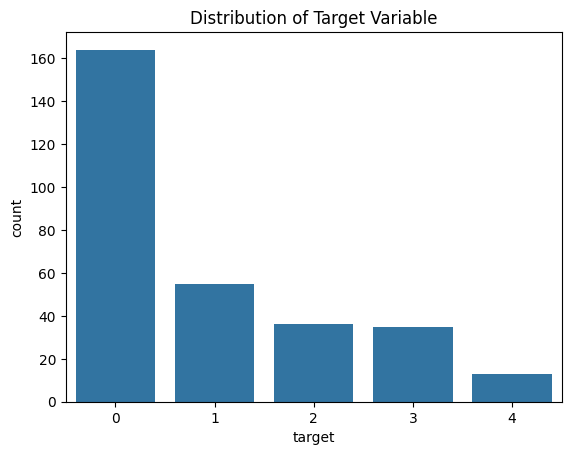

In [8]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

Visualise the conditions of the numerical features

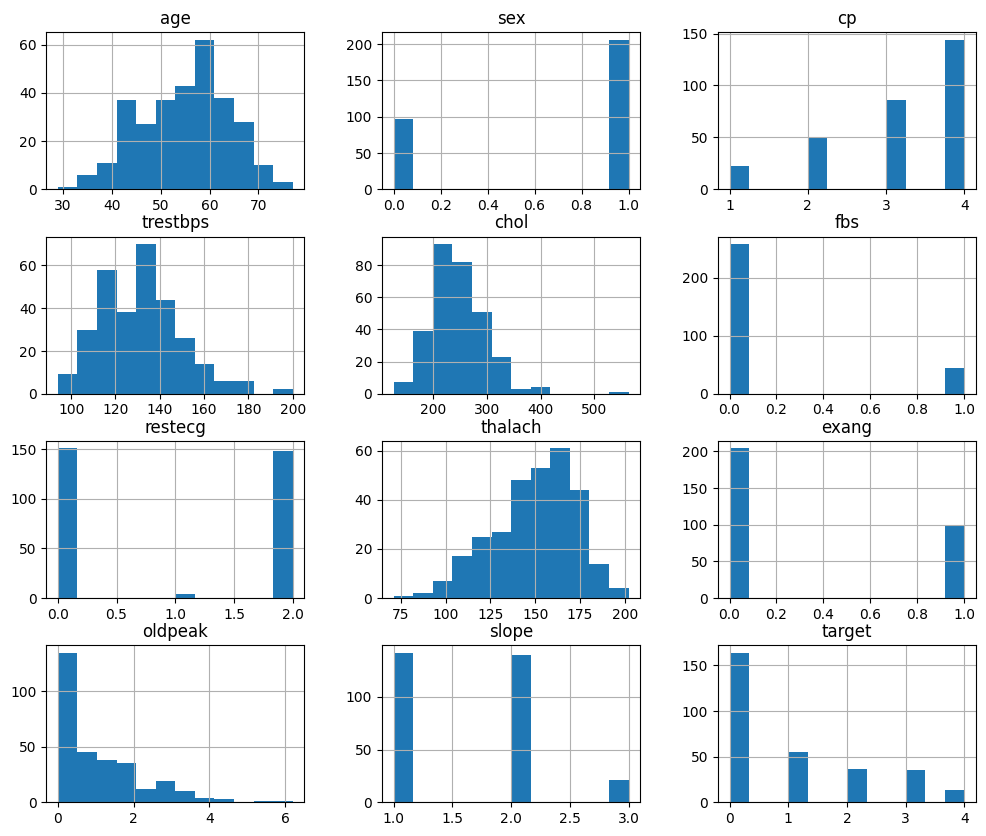

In [9]:
df.hist(bins=12, figsize=(12, 10))
plt.show()

Pair plot to identify the relationship of the features

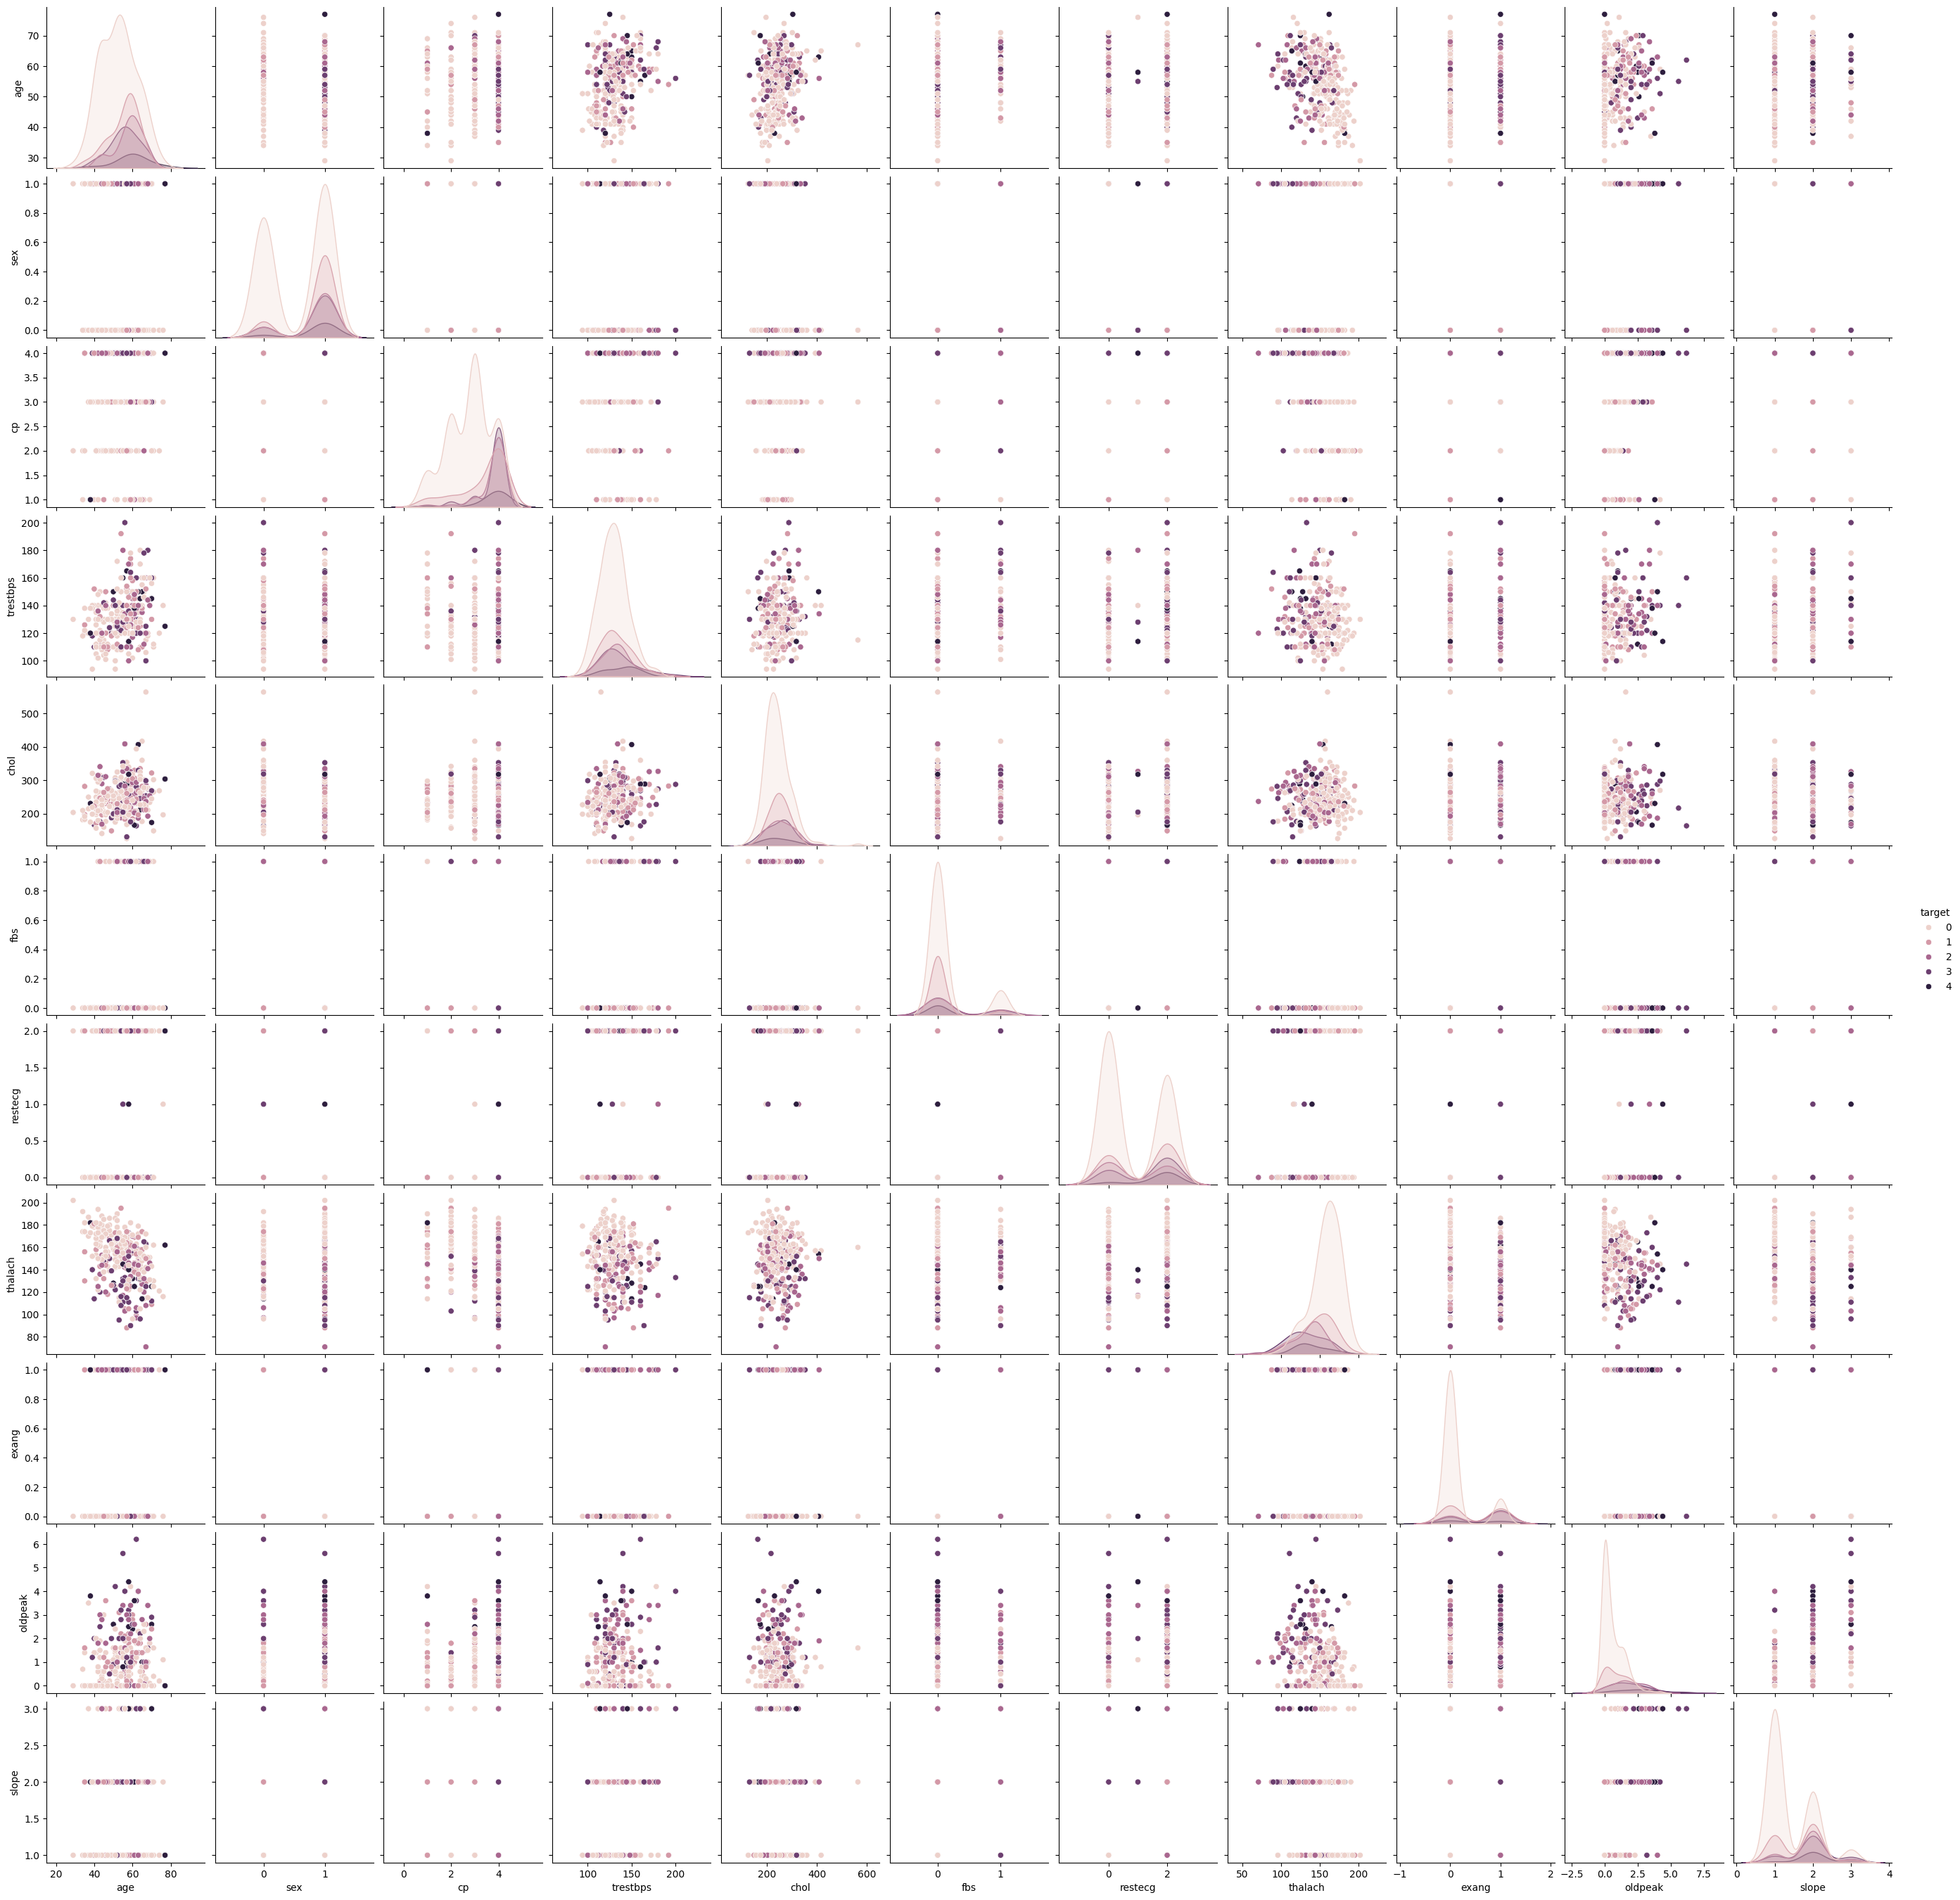

In [10]:
sns.pairplot(df, hue='target')
plt.show()

Handle missing values by replacing '?' with NaN and then imputing

In [11]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)

# Separate features and target
X = df.drop('target', axis=1)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final preprocessed dataframe
X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)

Clustering Algorithms and K-means clustering

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_preprocessed)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X_preprocessed)

# DBSCAN clustering
# Adjust DBSCAN parameters
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_preprocessed)

# Check the unique labels
print("Unique labels from DBSCAN:", set(dbscan_labels))

Unique labels from DBSCAN: {-1}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 PCA visualization

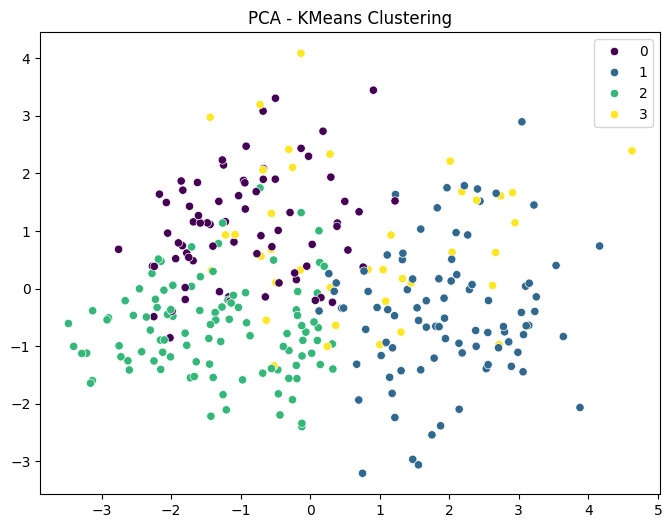

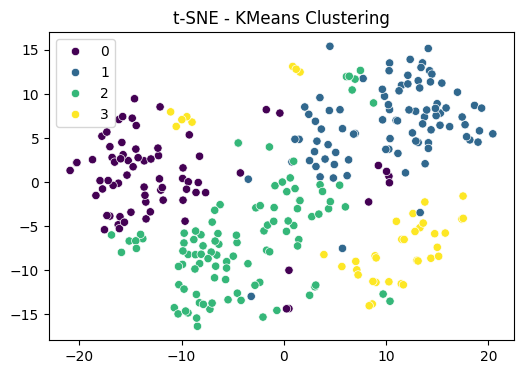

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='viridis')
plt.title('PCA - KMeans Clustering')
plt.show()

# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=kmeans_labels, palette='viridis')
plt.title('t-SNE - KMeans Clustering')
plt.show()


Gaussian Mixture Model (GMM)

In [14]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_preprocessed)

# Silhouette score and Davies-Bouldin index calculations
try:
    print("Silhouette Score for K-means: ", silhouette_score(X_preprocessed, kmeans_labels))
    print("Silhouette Score for Hierarchical: ", silhouette_score(X_preprocessed, hierarchical_labels))
    if len(set(dbscan_labels)) > 1:
        print("Silhouette Score for DBSCAN: ", silhouette_score(X_preprocessed, dbscan_labels))
    else:
        print("Silhouette Score for DBSCAN: Not Applicable (only one cluster found)")
    print("Silhouette Score for GMM: ", silhouette_score(X_preprocessed, gmm_labels))
except ValueError as e:
    print(e)

try:
    print("Davies-Bouldin Index for K-means: ", davies_bouldin_score(X_preprocessed, kmeans_labels))
    print("Davies-Bouldin Index for Hierarchical: ", davies_bouldin_score(X_preprocessed, hierarchical_labels))
    if len(set(dbscan_labels)) > 1:
        print("Davies-Bouldin Index for DBSCAN: ", davies_bouldin_score(X_preprocessed, dbscan_labels))
    else:
        print("Davies-Bouldin Index for DBSCAN: Not Applicable (only one cluster found)")
    print("Davies-Bouldin Index for GMM: ", davies_bouldin_score(X_preprocessed, gmm_labels))
except ValueError as e:
    print(e)

Silhouette Score for K-means:  0.13335696483847778
Silhouette Score for Hierarchical:  0.11511622103926623
Silhouette Score for DBSCAN: Not Applicable (only one cluster found)
Silhouette Score for GMM:  0.1081400500461008
Davies-Bouldin Index for K-means:  2.1222923727015943
Davies-Bouldin Index for Hierarchical:  2.168177899907483
Davies-Bouldin Index for DBSCAN: Not Applicable (only one cluster found)
Davies-Bouldin Index for GMM:  2.3601840229795177
